<a href="https://colab.research.google.com/github/shkabh/PUS2024_SKaur/blob/main/10_22_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install python3-rtree


ERROR: Could not find a version that satisfies the requirement python3-rtree (from versions: none)
ERROR: No matching distribution found for python3-rtree


In [2]:
#shapely
#fiona
import geopandas as gpd
gpd.datasets.available

[]

In [48]:
url = "https://github.com/nvkelso/natural-earth-vector/raw/refs/heads/master/110m_cultural/ne_110m_admin_0_countries.shp"

In [49]:
world.iloc[0]

,Fiji
POP_EST,889953.0
CONTINENT,Oceania
ISO_A3,FJI
GDP_MD,5496
geometry,"MULTIPOLYGON (((180 -16.067132663642447, 180 -..."


In [7]:
world.iloc[:,3]

,SOVEREIGNT
0,Fiji
1,United Republic of Tanzania
2,Western Sahara
3,Canada
4,United States of America
...,...
172,Republic of Serbia
173,Montenegro
174,Kosovo
175,Trinidad and Tobago


In [51]:
world = gpd.read_file(url)
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [52]:
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

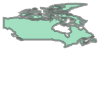

In [53]:
world.iloc[3].loc["geometry"]

In [54]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 217.2+ KB


In [12]:
world.tail()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."
176,Admin-0 country,1,3,South Sudan,SDS,0,2,Sovereign country,1,South Sudan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.83385 3.50917, 29.9535 4.1737, 29..."


In [55]:
world = world[["POP_EST", "CONTINENT", "ISO_A3", "NAME", "GDP_MD", "geometry"]]
world.head()

,POP_EST,CONTINENT,ISO_A3,NAME,GDP_MD,geometry
0,889953.0,Oceania,FJI,Fiji,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,58005463.0,Africa,TZA,Tanzania,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,603253.0,Africa,ESH,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,CAN,Canada,1736425,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,328239523.0,North America,USA,United States of America,21433226,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [15]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

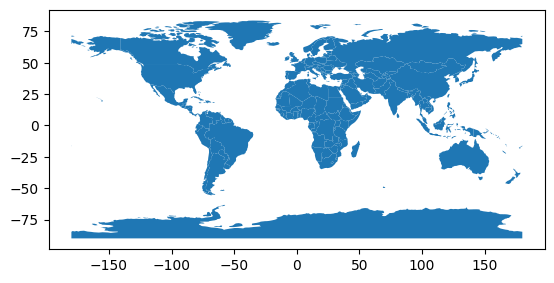

In [16]:
world.plot()

In [17]:
world.dissolve(by = "CONTINENT")

,geometry,POP_EST,ISO_A3,NAME,GDP_MD
CONTINENT,,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",58005463.0,TZA,Tanzania,63177
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4490.0,ATA,Antarctica,898
Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",18513930.0,KAZ,Kazakhstan,181665
Europe,"MULTIPOLYGON (((-53.55484 2.3349, -53.77852 2....",144373535.0,RUS,Russia,1699876
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",37589262.0,CAN,Canada,1736425
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",889953.0,FJI,Fiji,5496
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.58 -48.94, 70.525...",140.0,ATF,Fr. S. Antarctic Lands,16
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.2321 ...",44938712.0,ARG,Argentina,445445


<Axes: >

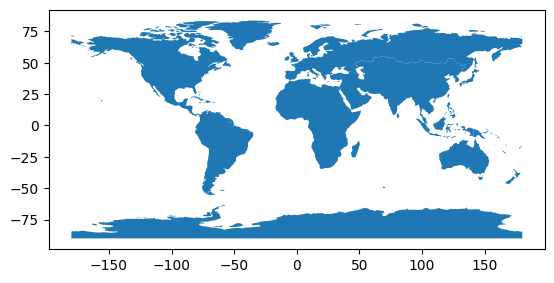

In [18]:
world.dissolve(by = "CONTINENT").plot()

Text(35.597222222222214, 0.5, 'Latitude')

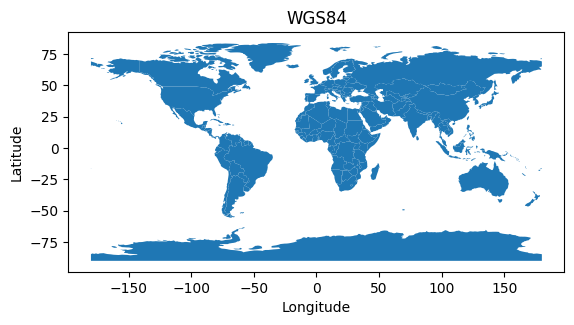

In [42]:
ax = world.plot()
ax.set_title("WGS84")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

<Axes: >

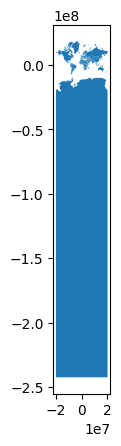

In [43]:
world.to_crs("EPSG:3395").plot()

Text(31.222222222222214, 0.5, 'meters northing')

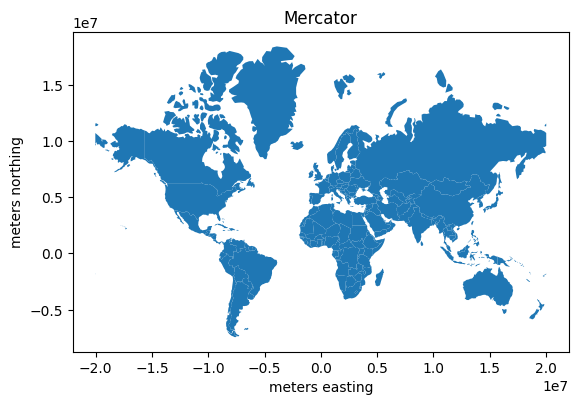

In [56]:
world_nopoles = world[(world.NAME != "Antarctica") & (world.NAME != "Fr. S. Antarctic Lands")]
world_nopoles = world_nopoles.to_crs("EPSG:3395")
ax = world_nopoles.plot()
ax.set_title("Mercator")
ax.set_xlabel("meters easting")
ax.set_ylabel("meters northing")

In [58]:
ax = world_nopoles.to_crs("EPSG:3407")
#ax.set_title("HK projection")

In [62]:
'''world_nopoles.to_crs(world.NAME == "China").plot()
import pylab as plt
fig = plt.figure(figure(figsize=(10,5)))
ax = fig.add_subplot(1,2,1)
'''


'world_nopoles.to_crs(world.NAME == "China").plot()\nimport pylab as plt\nfig = plt.figure(figure(figsize=(10,5)))\nax = fig.add_subplot(1,2,1)\n'

In [63]:
world.set_index("NAME", inplace = True)

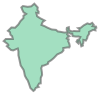

In [64]:
world.loc["India", "geometry"]

In [65]:
type(world.loc["Italy", "geometry"])

shapely.geometry.multipolygon.MultiPolygon

In [66]:
url = "https://www2.census.gov/geo/tiger/TIGER2024/UAC20/tl_2024_us_uac20.zip"

In [69]:
cities = gpd.read_file(url)
cities.plot(ax = ax, color = "red")

<Axes: >

<Axes: >

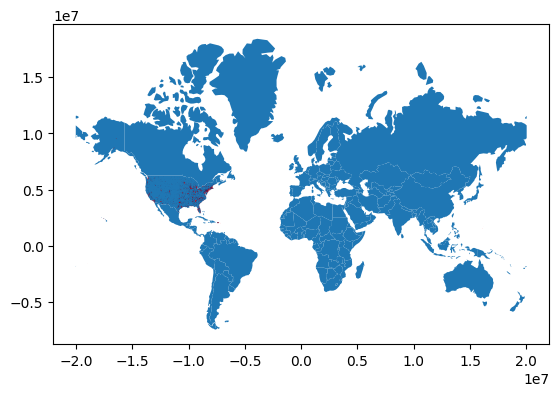

In [70]:
ax = world_nopoles.plot()
cities.to_crs(world_nopoles.crs).plot(ax = ax, color = "red")